# Homework 2-4 Example Solution

First, we import the packages we need:

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
#from scipy.integrate import solve_ivp (If you wanted to use solve_ivp instead)
%matplotlib inline

In [13]:
FA0 = 0.1362 #mol/s
k = 0.0074#*10.0/3.0 #mol/kg-s (k' in text)
alpha = 0.0367#0.0367 #1/kg
epsilon = -0.15

Define a function that returns the relevant derivatives (dX/dW and dp/dW) given current values of the dependent (X,p) and indepdent (W) variables

In [14]:
def deriv(current, W): #Note that we explicitly made this function of W, even though it is not used. This is required by the odeint
    X = current[0]
    p = current[1]
    ra = -1.0*k*(1.0-X)/(1+epsilon*X)*p
    dXdW = -ra/FA0
    dpdW = -alpha*(1.0+epsilon*X)/(2.0*p)
    return dXdW,dpdW

Define the range of W over which we want to integrate, and the initial conditions

In [15]:
W_range = np.linspace(0, 28, 50) #Based on problem statement (kg)
X0 = 0.0 #No conversion at beginning of reactor
p0 = 1.0 #Remember that p = P/P0
init = [X0, p0] #Define a list of our initial conditions

Now we call odeint to integrate our function.

In [16]:
#Now the magic: call odeint on our defined problem
sol = odeint(deriv, init, W_range)

## FIrst part - reproducing plots

Text(0, 0.5, '-rA')

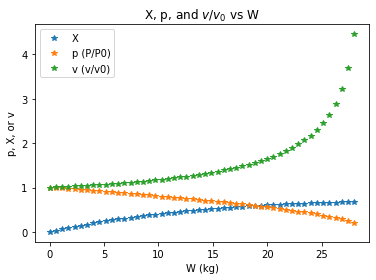

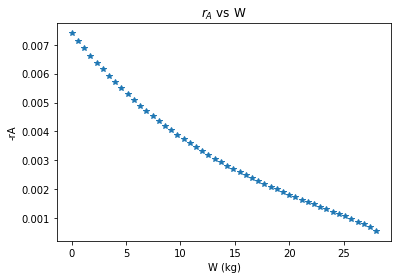

In [17]:
X_odeint = sol[:,0]
p_odeint = sol[:,1]
v_odeint = 1/p_odeint*(1+epsilon*X_odeint)
rate_odeint = 1.0*k*(1.0-X_odeint)/(1+epsilon*X_odeint)*p_odeint
plt.figure()
plt.plot(W_range, X_odeint, '*', label='X')
plt.plot(W_range, p_odeint, '*', label='p (P/P0)')
plt.plot(W_range, v_odeint, '*', label='v (v/v0)')
#We'll show a faster way of doing the above four lines below
plt.title(r'X, p, and $v/v_0$ vs W')
plt.xlabel('W (kg)')
plt.ylabel('p, X, or v')
plt.legend()

plt.figure()
plt.plot(W_range, rate_odeint, '*')
plt.title(r'$r_A$ vs W')
plt.xlabel('W (kg)')
plt.ylabel('-rA')

## Reporting necessary weight of catalyst
One very simple way of doing this is with the np.where() function, taking advantage of the fact that X is monotonically increasing over the length of the reactor

In [18]:
def required_W(X_target):
    
    if X_target > max(X_odeint): #This conversion was not reached
        print('Conversion of ', str(X_target), ' is not possible in this reactor')
        return 0
    else:
    #Loop through X_odeint, search for first value above X_target, report its index, and return corresponding W
        for i in X_odeint:
            if i >= X_target:
                needed_weight = W_range[np.where(X_odeint == i)]
                print('Conversion of ', str(X_target), ' requires ', str(needed_weight), ' kg catalyst')
                break
        return needed_weight
            
needed_weight = required_W(0.63)
needed_weight = required_W(0.9)

Conversion of  0.63  requires  [22.85714286]  kg catalyst
Conversion of  0.9  is not possible in this reactor


## How initial pressure affects conversion
The beauty of setting up this problem computationally is that we can very quickly and easily explore the effect of changing various parameters on the solution. Let's do that now, examining the impact of $P_0$. From lecture, recall that 

$$\alpha \propto \frac{\beta_0}{P_0}$$

$\beta_0$ is also an implicit function of $P_0$, because

$$\beta_0 \propto \frac{1}{\rho_0}$$

For simplicity, assume the ideal gas law such that $\rho_0 \propto P_0$. Therefore

$$\alpha \propto \frac{1}{P_0 ^2}$$

So, all we need to do is slightly redefine our functions to let us easily manipulate alpha, and produce the necessary plots

In [19]:
def deriv2(current, W, alpha_loc, epsilon_loc): #Redefining _loc as local version of the variables
    X, p = current
    ra = -1.0*k*(1.0-X)/(1+epsilon_loc*X)*p
    #If pressure is below a threshold, no change in rest of reactor (as approximation and to stop the solver blowing up when P drops to 0)
    threshold = 0.1 #atm
    if p > threshold:
        dXdW = -ra/FA0
        dpdW = -alpha_loc*(1.0+epsilon_loc*X)/(2.0*p)
    else:
        dXdW = 0
        dpdW = 0
    return dXdW,dpdW

In [20]:
b_range = np.linspace(0, 5, 10)
for i in b_range:
    print(i)

0.0
0.5555555555555556
1.1111111111111112
1.6666666666666667
2.2222222222222223
2.7777777777777777
3.3333333333333335
3.8888888888888893
4.444444444444445
5.0


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 0.          0.          0.         21.60606061 20.21212121 19.51515152
 19.05050505 18.58585859 18.35353535 18.12121212 17.88888889 17.65656566
 17.65656566 17.42424242 17.42424242]
[ 0.          0.          0.         21.60606061 20.21212121 19.51515152
 19.05050505 18.58585859 18.35353535 18.12121212 17.88888889 17.65656566
 17.65656566 17.42424242 17.42424242]


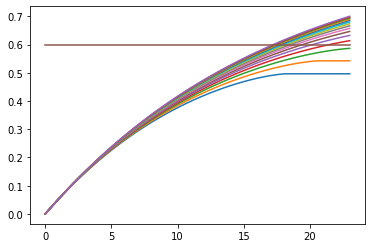

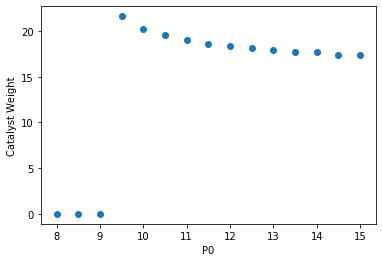

In [24]:
#A function to produce plots of X vs W for different values of alpha
def vary_alpha(alpha_range, target): #feed a range of aphas, and a target conversion
    needed_weight = [0]*alpha_range #Initial a list to store the necessary catalyst weights
    print(needed_weight)
    W_range_alpha_range = np.linspace(0, 23, 100)
    for i in alpha_range: #For each alpha value, integrate the system, plot the results, and report W needed for target conversion
        sol3 = odeint(deriv2, init, W_range_alpha_range, args=(i, epsilon)) #Solve using the new function
        np_sol = np.asarray(sol3) #Convert to numpy array
    
        plt.figure(1) #Plot X vs W for each value of alpha (NOTE YOUR SOLUTION DOESN't HAVE TO DO THIS, BUT IT'S USEFUL TO SEE)
        #for col in range(np_sol.shape[1]): 
        plt.plot(W_range_alpha_range, np_sol[:,0], label='X, alpha = '+str(i))
        #plt.legend()
        
        #Return first point of W where X > 0.6, for plotting
        X_sol = np_sol[:,0]
        #print(X_sol)
        for j in X_sol:
            if j >= target:
                needed_weight[np.where(alpha_range == i)] = W_range_alpha_range[np.where(X_sol == j)]
                break
    plt.plot([0, W_range_alpha_range[-1]], [target, target])
    print(needed_weight)
    return needed_weight

#Problem statement asks to range pressure from 8-15 atm. Note that all this changes is P0, and alpha is proportional to the inverse of P0^2

def plot_W_for_X(P0, target):
    alpha_pressure = alpha*(10.0**2)/(P0**2)
    needed_weight = vary_alpha(alpha_pressure, target)
    print(needed_weight)
    plt.figure(2)
    plt.scatter(P0, needed_weight)
    plt.xlabel('P0')
    plt.ylabel('Catalyst Weight')

P0 = np.linspace(8.0, 15.0, 15)
plot_W_for_X(P0, 0.6)

Notice that higher amounts of catalyst are needed at low pressures. The downside of this is, the more catalyst you have, the more pressure drop you have, such that you ultimately get to an untenable scenario where your incoming feed stream doesn't have sufficient driving force to get through the required length of reactor. You see this for the 9 atm case, where there was no feasible solution.

I would argue that this reactor has been poorly designed! A variation of 10% in incoming pressure leads to a complete failure. Ideally you don't want your final pressure to be so low compared to the incoming pressure under normal operation. Design with some tolerance in mind